<a href="https://colab.research.google.com/github/tawaqalt/arbritrary/blob/master/Tawakalitu_Housing_price_Forecasts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Dataset

In [2]:
df = pd.read_csv('/content/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
new_df = df[['GrLivArea', 'YearBuilt', 'SalePrice']]
new_df.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


In [5]:
new_df.columns

Index(['GrLivArea', 'YearBuilt', 'SalePrice'], dtype='object')

In [6]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   YearBuilt  1460 non-null   int64
 2   SalePrice  1460 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB


In [7]:
new_df.isnull().sum()

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
new_df.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


In [10]:
new_df.corr()

,GrLivArea,YearBuilt,SalePrice
GrLivArea,1.000000,0.199010,0.708624
YearBuilt,0.199010,1.000000,0.522897
SalePrice,0.708624,0.522897,1.000000


# EDA

Text(0.5, 1.0, 'GrLivArea')

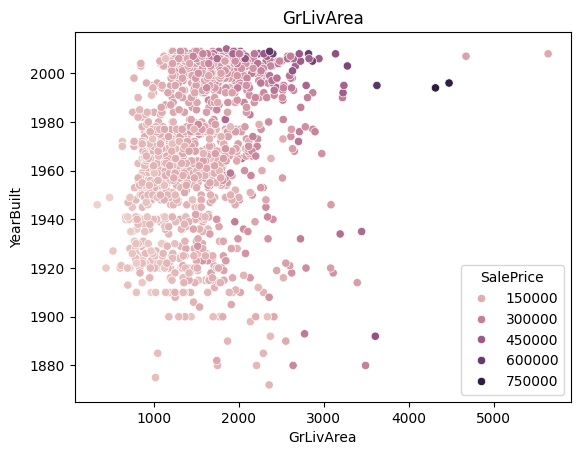

In [11]:
#visualizing witht a scatterplot
sns.scatterplot(x='GrLivArea', y='YearBuilt', hue = 'SalePrice', data = new_df)
plt.title('GrLivArea')

Text(0.5, 1.0, 'SalesPice')

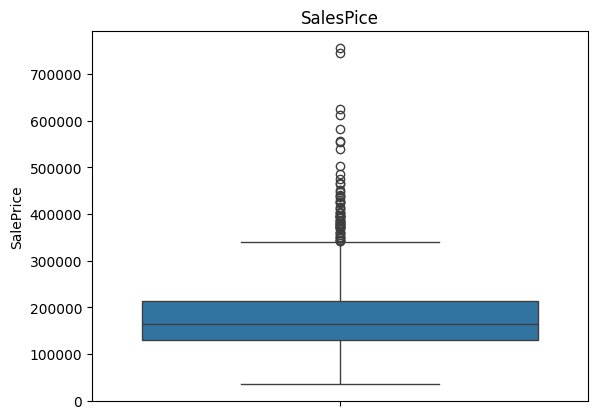

In [12]:
sns.boxplot(df['SalePrice'])
plt.title('SalesPice')

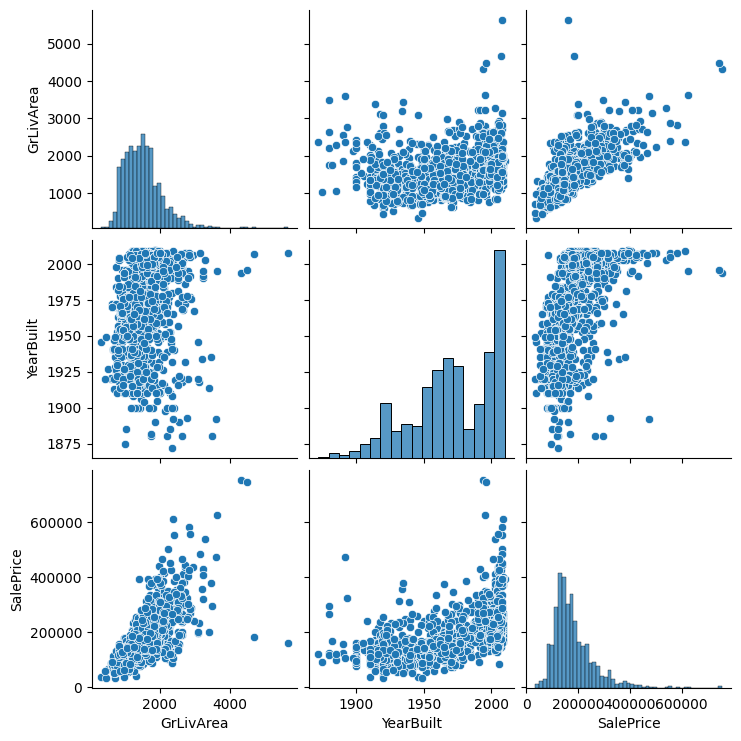

In [13]:
sns.pairplot(new_df)

## Problem 1

In [14]:
X = new_df.loc[:, ['GrLivArea', 'YearBuilt']]
y = new_df.loc[:, 'SalePrice']

In [15]:
X.shape, y.shape

((1460, 2), (1460,))

In [16]:
X.head()

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000


In [17]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

This charrt reveals that the median price of the house is below #200000(i.e 180000)

# Data Preprocessing

In [18]:
#training and scaling the data
from sklearn.model_selection import train_test_split

#applying train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [19]:
X_train.shape, y_train.shape

((1168, 2), (1168,))

In [20]:
X_test.shape, y_test.shape

((292, 2), (292,))

In [21]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_tr =scaler.transform(X_train)
X_test_tr = scaler.transform(X_test)

Evaluating and estimating uisng Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
#Uisng logistic Regresiion to estimate and evaluate the data
lrm = LinearRegression()
lrm.fit(X_train_tr, y_train)
y_pred = lrm.predict(X_test_tr)

In [23]:
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
mse = mean_squared_error(y_test, y_pred)
print('MSE of the model is', mse)

MSE of the model is 2495554898.6683207


In [24]:
lrm.score(X_test_tr, y_test)

0.6746481399539467

In [25]:
print('R2 score of the model is', r2_score(y_test, y_pred))

R2 score of the model is 0.6746481399539467


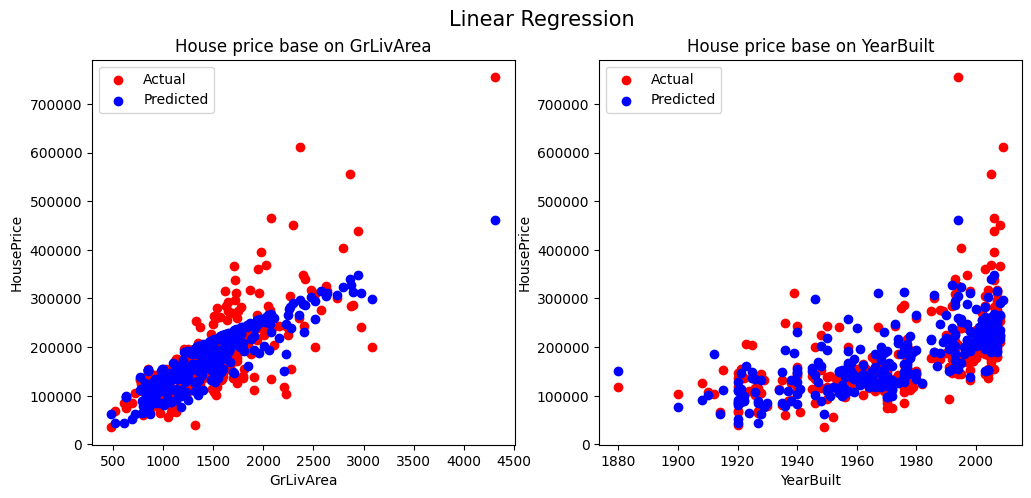

In [26]:
def visualization(y_pred, title):
  fig, (ax1, ax2 )= plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
  ax1.scatter(X_test.loc[:, 'GrLivArea'], y_test, color='red')
  ax1.scatter(X_test.loc[:, 'GrLivArea'], y_pred, color='blue')
  classes = ['Actual', 'Predicted']
  ax1.legend(classes)
  ax1.set(title = 'House price base on GrLivArea', xlabel = 'GrLivArea',  ylabel = 'HousePrice')

  ax2.scatter(X_test.loc[:, 'YearBuilt'], y_test, color='red')
  ax2.scatter(X_test.loc[:, 'YearBuilt'], y_pred, color='blue')
  ax2.legend(classes)
  ax2.set(title = 'House price base on YearBuilt', xlabel = 'YearBuilt',  ylabel = 'HousePrice')

  fig.suptitle(title, fontsize=15)
visualization(y_pred, 'Linear Regression')

Insights: The visualization reveals a very low performance of the model. with an r2 score of 0.3. the chart shows that the model is not performing well.

# Problem 3

# SVM Regressor

In [27]:
#using SVM to estimate and evaluate the data
from sklearn.svm import SVR
svr = SVR()
#Instantiating the model
svr.fit(X_train_tr, y_train)
y_pred_svm = svr.predict(X_test_tr)

In [28]:
print('R2 score of the model is', r2_score(y_test, y_pred_svm))
print('MSE of the model is', mean_squared_error(y_test, y_pred_svm))

R2 score of the model is -0.022385004052411173
MSE of the model is 7842026490.418324


In [29]:
svr.score(X_test_tr, y_test)

-0.022385004052411173

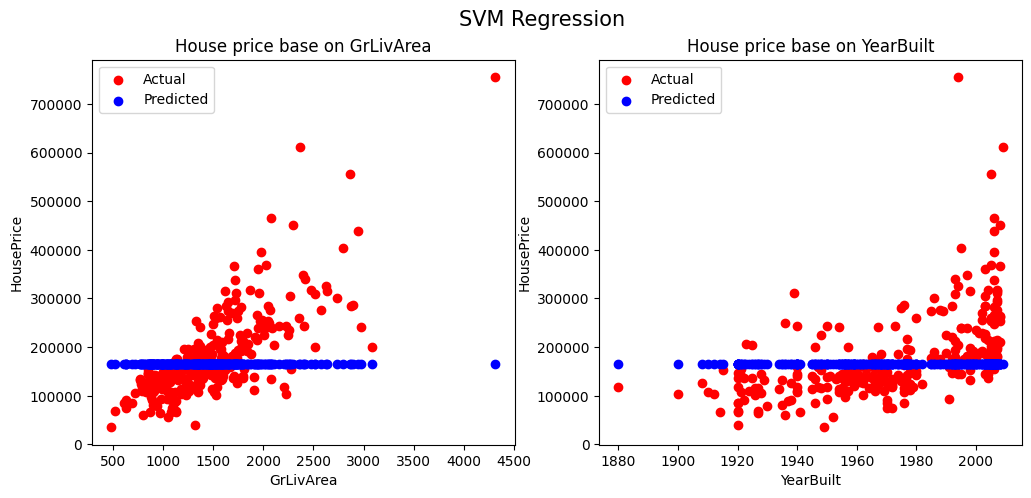

In [30]:
#visualization of the results
visualization(y_pred_svm, 'SVM Regression')

Insights: the visualization shows that the model perfomance is very poor, thge points i=on the scatter plot are clustered together.

# Decision Tree Regressor Model

In [31]:
#using Decision Tree Regressor to estimate and evaluate the data
from sklearn.tree import DecisionTreeRegressor
#Instantiating the model
dtr = DecisionTreeRegressor()
dtr.fit(X_train_tr, y_train)
y_pred_dtr = dtr.predict(X_test_tr)

In [32]:
#using r2 score and mean squared error to estimate the accuracy of the model
print('R2 score of the model is', r2_score(y_test, y_pred_dtr))
print('MSE of the model is', mean_squared_error(y_test, y_pred_dtr))

R2 score of the model is 0.7157095901209656
MSE of the model is 2180600181.347127


In [33]:
dtr.score(X_test_tr, y_test)

0.7157095901209656

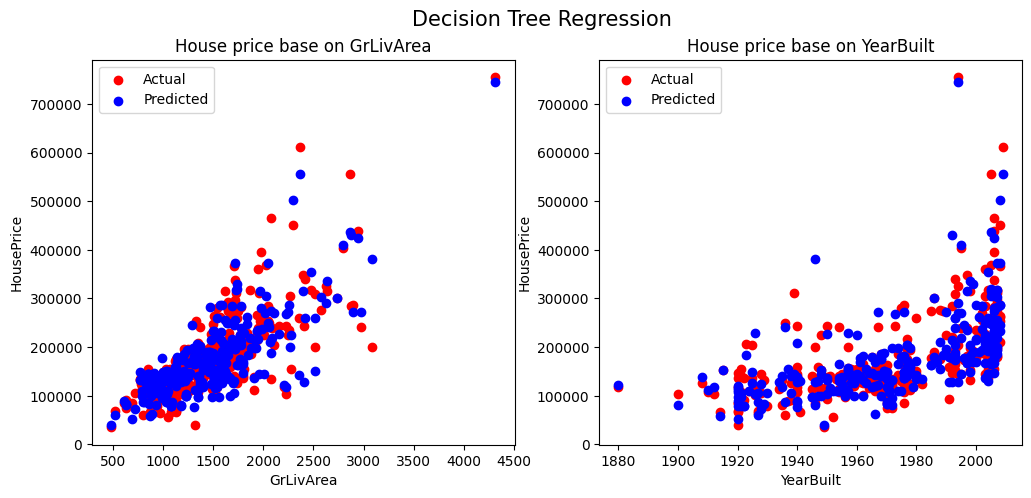

In [34]:
#visualization of the results
visualization(y_pred_dtr, 'Decision Tree Regression')

Insights: The chart shows a good performance of the model having an r2 score of 0.70. the data shows that the model is not overfitted. the data points are uniformly distributed.

# Random Forest Rgeression Model

In [35]:
#using Random Forest Regressor to estimate and evaluate the data
from sklearn.ensemble import RandomForestRegressor
#Instantiating the model
rfr = RandomForestRegressor()
rfr.fit(X_train_tr, y_train)
y_pred_rfr = rfr.predict(X_test_tr)

In [36]:
#evaluating the model using r2 score and mean squared error
print('R2 score of the model is', r2_score(y_test, y_pred_rfr))
print('MSE of the model is', mean_squared_error(y_test, y_pred_rfr))

R2 score of the model is 0.7864154508118241
MSE of the model is 1638263165.0883136


In [37]:
rfr.score(X_test_tr, y_test)

0.7864154508118241

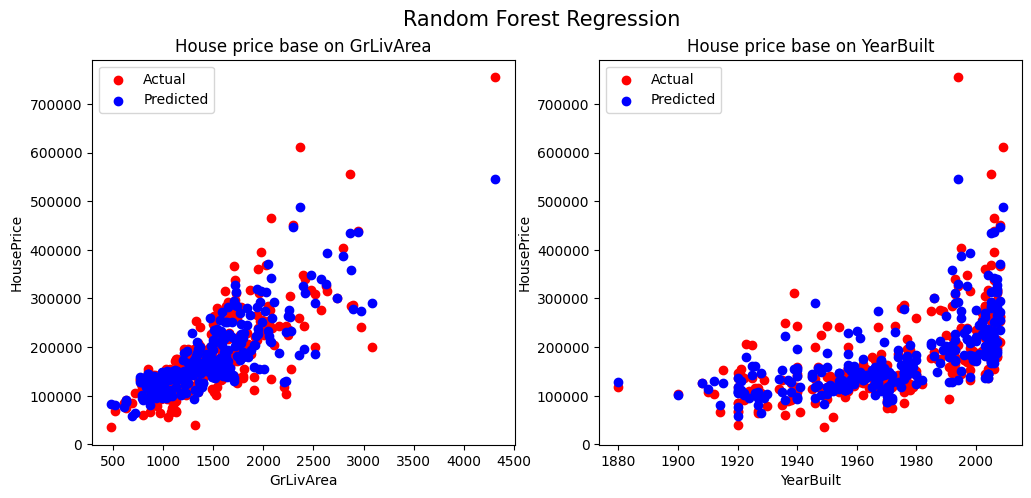

In [38]:
#visualizing the model
visualization(y_pred_rfr, 'Random Forest Regression')

The Random Forest model performed best with an R-squared score of 0.79, indicating it can explain 79% of the variance in the target variable. The data points are uniformly distributed, suggesting no significant bias or systematic errors across different ranges.

# Summarizng the index value in one table

In [39]:
from tabulate import tabulate

# Define the data
models = ['Linear Regression', 'SVM', 'Decision Tree', 'Random Forest']
mse = [4674589812.702055, 7842026490.418324, 2149334384.7717843, 1568402931.0539572]
r2_score = [0.3905617979686514, -0.022385004052411173, 0.7197857918014166, 0.7955233077852207]
accuracy_score = [0.0136986301369863, -0.022385004052411173, 0.6956945932136349, 0.7955233077852207]

# Create the table
table = []
for i in range(len(models)):
    table.append([models[i], mse[i], r2_score[i], accuracy_score[i]])

# Print the table
print(tabulate(table, headers=['Model', 'MSE', 'R^2 Score', 'Accuracy Score'], floatfmt=".4f"))

Model                          MSE    R^2 Score    Accuracy Score
-----------------  ---------------  -----------  ----------------
Linear Regression  4674589812.7021       0.3906            0.0137
SVM                7842026490.4183      -0.0224           -0.0224
Decision Tree      2149334384.7718       0.7198            0.6957
Random Forest      1568402931.0540       0.7955            0.7955


# Problem 4: Advanced Assignment

The new version of colab notebook does not support plotting the correlation heatmap with categorical data so only the numeraical data will be plotted

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [41]:
#correlation of numerical features with the target variable
df1 = df.loc[:, ['MSSubClass','LotFrontage','LotArea','GrLivArea', 'YearBuilt', '' 'TotalBsmtSF','1stFlrSF','2ndFlrSF', 'Fireplaces', 'GarageYrBlt', 'GarageArea',  'OverallQual','OverallCond', 'SalePrice']]

Plotting the Correlation heat map

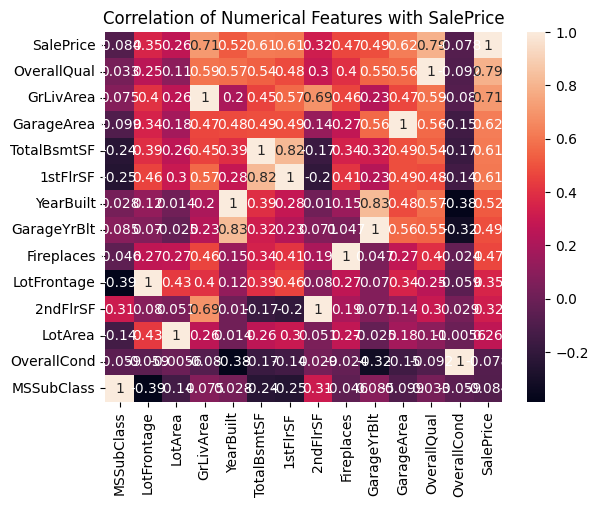

In [42]:
sns.heatmap(df1.corr().sort_values(by = 'SalePrice', ascending = False), annot = True)
plt.title('Correlation of Numerical Features with SalePrice')
plt.show()

In [43]:
# creating a new DataFrame using 11 of the features form the df1 features
new_df1 = df1.loc[:, ['MSSubClass','OverallQual', 'YearBuilt', 'GarageArea', 'LotArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'Fireplaces', 'SalePrice']]

In [44]:
# chcking fo the data types
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   MSSubClass   1460 non-null   int64
 1   OverallQual  1460 non-null   int64
 2   YearBuilt    1460 non-null   int64
 3   GarageArea   1460 non-null   int64
 4   LotArea      1460 non-null   int64
 5   GrLivArea    1460 non-null   int64
 6   TotalBsmtSF  1460 non-null   int64
 7   1stFlrSF     1460 non-null   int64
 8   2ndFlrSF     1460 non-null   int64
 9   Fireplaces   1460 non-null   int64
 10  SalePrice    1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [45]:
#checking for the shape of the dataframe
new_df1.shape

(1460, 11)

In [46]:
#checking for the column names
new_df1.columns

Index(['MSSubClass', 'OverallQual', 'YearBuilt', 'GarageArea', 'LotArea',
       'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'Fireplaces',
       'SalePrice'],
      dtype='object')

In [47]:
#checking for null values
new_df1.isnull().sum()

MSSubClass     0
OverallQual    0
YearBuilt      0
GarageArea     0
LotArea        0
GrLivArea      0
TotalBsmtSF    0
1stFlrSF       0
2ndFlrSF       0
Fireplaces     0
SalePrice      0
dtype: int64

In [48]:
#checking for duplicates
new_df1.duplicated().sum()

0

In [49]:
features = new_df1.drop('SalePrice', axis = 1)
target = new_df1['SalePrice']

In [50]:
features.shape

(1460, 10)

In [51]:
target.shape

(1460,)

In [52]:
features.head()

,MSSubClass,OverallQual,YearBuilt,GarageArea,LotArea,GrLivArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,Fireplaces
0,60,7,2003,548,8450,1710,856,856,854,0
1,20,6,1976,460,9600,1262,1262,1262,0,1
2,60,7,2001,608,11250,1786,920,920,866,1
3,70,7,1915,642,9550,1717,756,961,756,1
4,60,8,2000,836,14260,2198,1145,1145,1053,1


In [53]:
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [54]:
##scaling and training features
#splitting the data into train and test
X_train_nw, X_test_nw, y_train_nw, y_test_nw = train_test_split(features, target, test_size = 0.2, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#scaling the data
scaler.fit(X_train_nw, X_test_nw)
X_train_new = scaler.transform(X_train_nw)
X_test_new = scaler.transform(X_test_nw)

In [55]:
X_test_new.shape

(292, 10)

In [56]:
y_test.shape

(292,)

# Linear Regression

In [57]:
#Logistic Regression
# Instantiate the model

# Fit the model
lr = LinearRegression()
# Fit the model
lr.fit(X_train_new, y_train_nw)
y_pred_lr = lr.predict(X_test_new)
mse_error = mean_squared_error(y_test_nw, y_pred_lr)
score = lr.score(X_test_new, y_test_nw)
#r2_score = r2_score(X_test_new, y_test_nw)
print('MSE of the model is', mse_error)
print('Accuracy score of the model is', score)

MSE of the model is 1534353229.0369422
Accuracy score of the model is 0.7999624543217931


# SVM

In [58]:
#SVM
#Instantiate the model
svm = SVR()
#Fit the model
svm.fit(X_train_new, y_train_nw)
y_pred_svm = svm.predict(X_test_new)
mse_error = mean_squared_error(y_test_nw, y_pred_svm)
score_svm = svm.score(X_test_new, y_test_nw)
print('MSE of the model is', mse_error)
print('Accuracy score of the model is', score_svm)

MSE of the model is 7848992501.952674
Accuracy score of the model is -0.023293180751313702


# Decision Tree Regressor

In [59]:
#Decision Tree
#Instantiate the model
dt = DecisionTreeRegressor()
#Fit the model
dt.fit(X_train_new, y_train_nw)
y_pred_dt = dt.predict(X_test_new)
mse_error = mean_squared_error(y_test_nw, y_pred_dt)
score_dt = dt.score(X_test_new, y_test_nw)
print('MSE of the model is', mse_error)
print('Accuracy score of the model is', score_dt)

MSE of the model is 1370646260.958904
Accuracy score of the model is 0.8213053494811469


In [60]:
#Random Forest
#Instantiate the model
rf = RandomForestRegressor()
#Fit the model
rf.fit(X_train_new, y_train_nw)
y_pred_rf = rf.predict(X_test_new)
mse_error = mean_squared_error(y_test_nw, y_pred_rf)
score_rf = rf.score(X_test_new, y_test_nw)
print('MSE of the model is', mse_error)
print('Accuracy score of the model is', score_rf)

MSE of the model is 933022719.8791866
Accuracy score of the model is 0.8783594472155642


# Visualization of the model

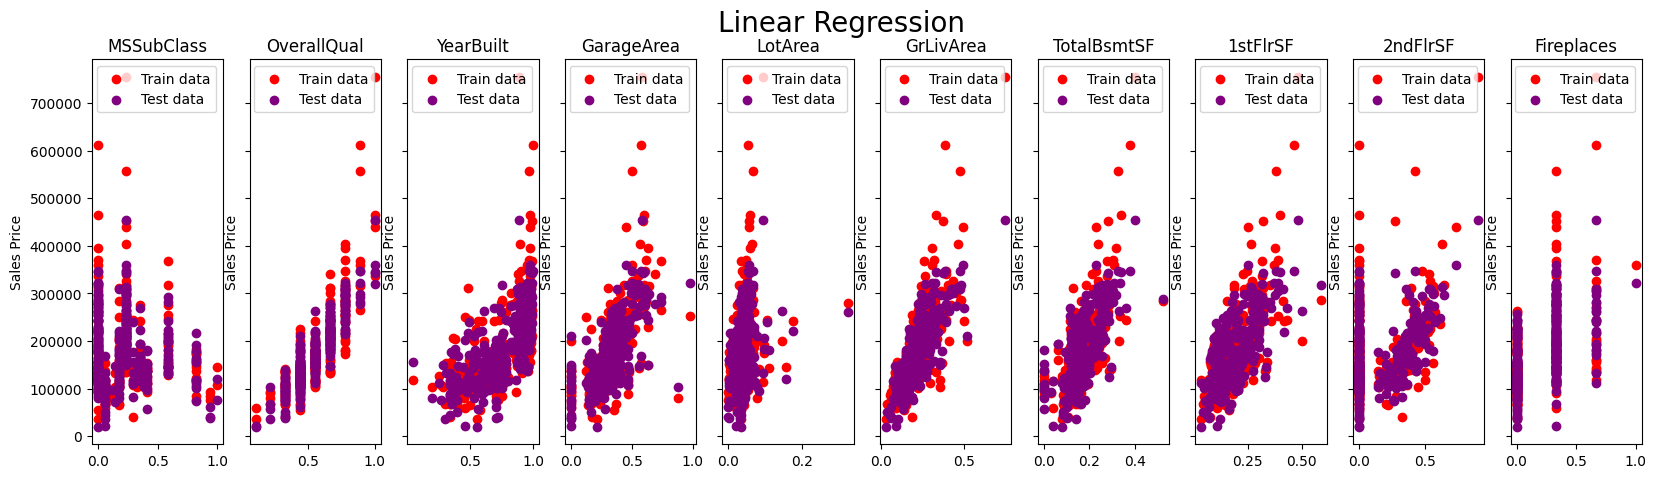

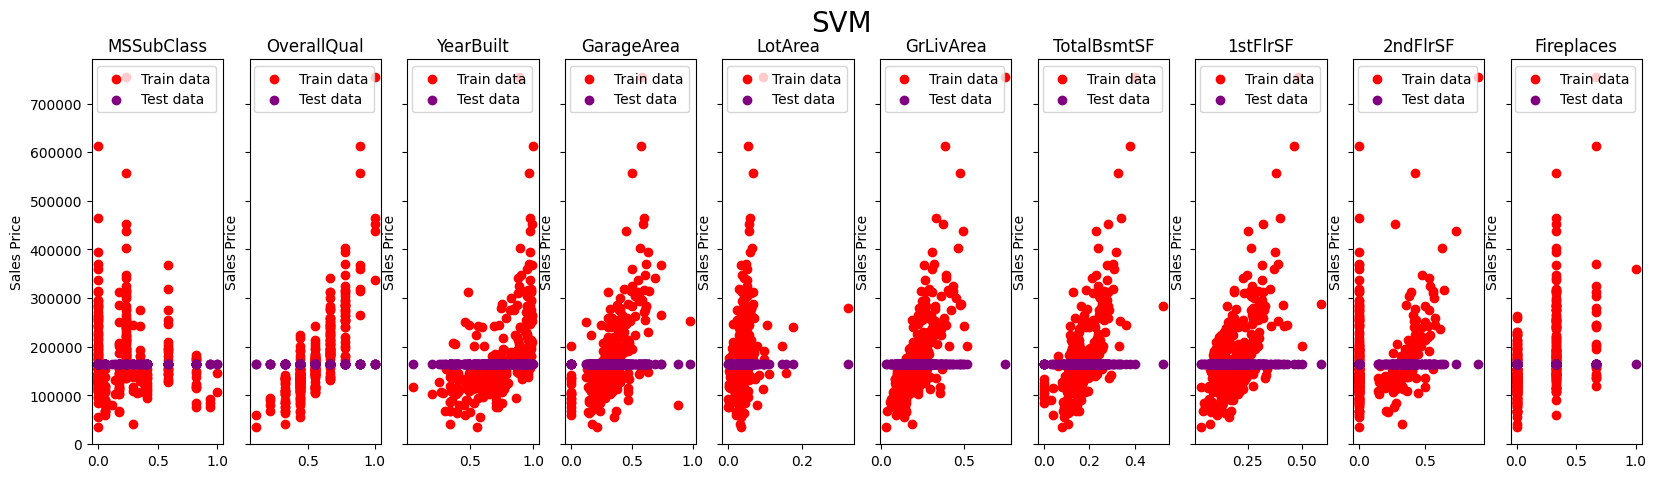

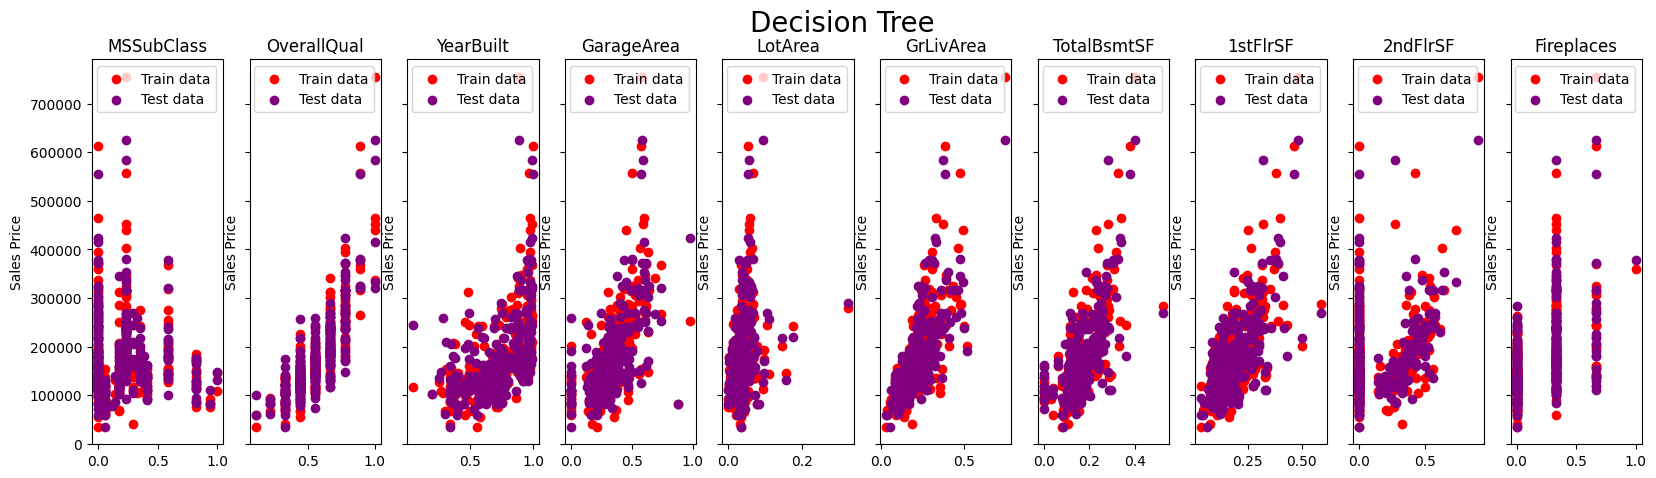

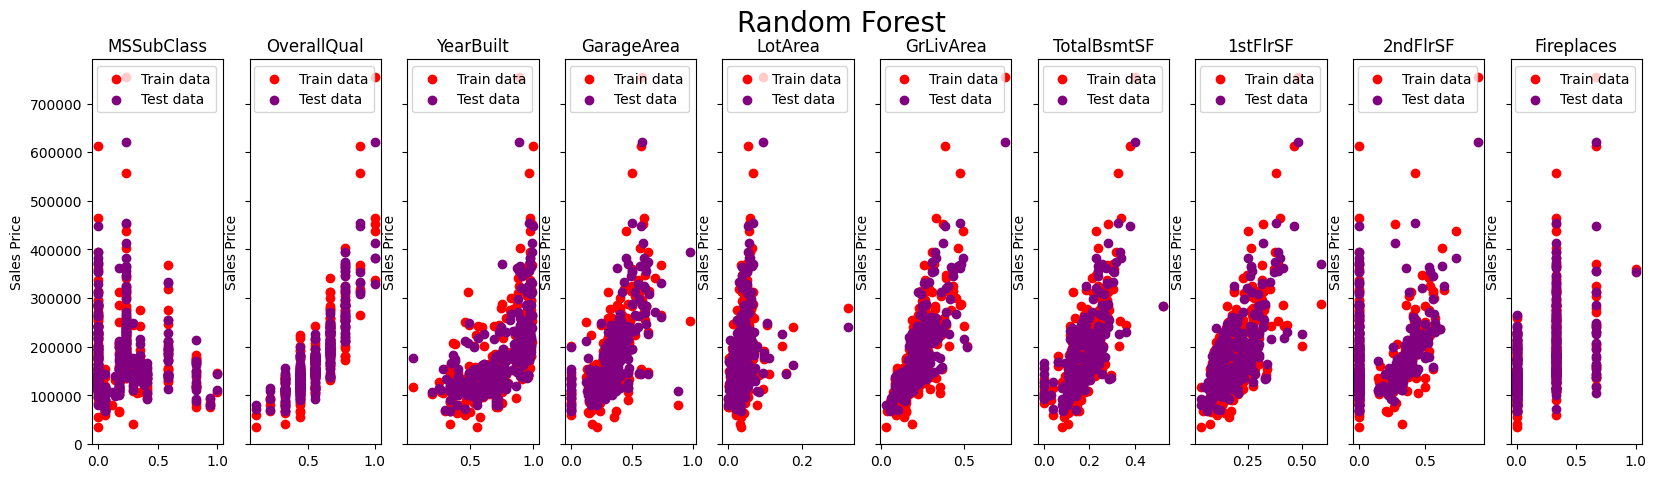

In [61]:
def vizregression_models(X_test, y_test, features, model_names):
    lrmodel = LinearRegression().fit(X_train_new, y_train_nw).predict(X_test_new)
    svrmodel = SVR().fit(X_train_new, y_train_nw).predict(X_test_new)
    dtmodel = DecisionTreeRegressor().fit(X_train_new, y_train_nw).predict(X_test_new)
    rfmodel = RandomForestRegressor().fit(X_train_new, y_train_nw).predict(X_test_new)
    y_preds = [lrmodel, svrmodel, dtmodel, rfmodel]

    for method, y_pred in zip(model_names, y_preds):
        fig, ax = plt.subplots(1, len(features), figsize=(2*len(features), 5), sharey=True)
        fig.suptitle(method, size=20)
        for i, feature in enumerate(features):
            ax[i].scatter(X_test[:, i], y_test, c='red', label='Train data')
            ax[i].scatter(X_test[:, i], y_pred, c='purple', label='Test data')
            ax[i].set_title(feature.strip())
            ax[i].set_ylabel('Sales Price')
            ax[i].legend()

features = ['MSSubClass','OverallQual', 'YearBuilt', '  GarageArea', 'LotArea', 'GrLivArea', 'TotalBsmtSF', '   1stFlrSF', '2ndFlrSF', 'Fireplaces']
model_names = ['Linear Regression', 'SVM', 'Decision Tree', 'Random Forest']
vizregression_models(X_test_new, y_test_nw, features, model_names)


Conclusion: the plots reveals that Decision Tree and Random Forest performed excellently as evidenced by the  equal distribution of the prediction and test values which shows that the model will perform well on unseen data. SVM perfromed very poorly which shows it's not one of the best models to use for a regression problem.